<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/EJERCICIO_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

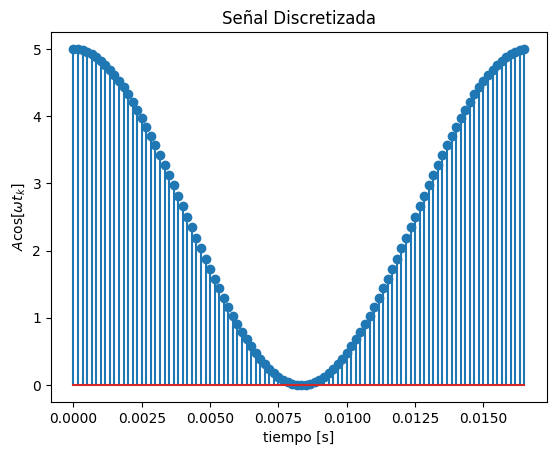

In [1]:
#EJERCICIO punto 1
import numpy as np
import matplotlib.pyplot as plt

F = 60 #Frecuencia
T_o = 1/60 #Periodo funcion coseno
Fs= 100*F #Frecuencia de muestreo
Ts= 1/Fs #Tiempo de muestreo
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = T_o #tiempo final
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo
xv = A * np.cos(2*np.pi*tv/T_o) #vector de amplitud

y_min =0
y_max =5

def b(x,ymin =0, ymax = 5):
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c #pendiente
  return yv

yv = b(xv,ymin=0,ymax=5) #funcion de ymin y ymax definidos por nosotros

plt.stem(tv,yv) #función para imprimir la señal discretizada
plt.xlabel('tiempo [s]')
plt.ylabel('$A\cos[\omega t_k]$')
plt.title('Señal Discretizada')
plt.show()

In [10]:
from scipy.spatial.distance import cdist

nbits= 3 #definición de la cantidad de bits requeridos
ymin=0
ymax=5
ve=np.linspace(ymin,ymax,2**nbits) #vector de cuantización

d=cdist(yv.reshape(-1,1),ve.reshape(-1,1))
d.shape


(100, 8)

In [11]:
ind=np.argmin(d,axis=1) #busca la posición de los elementos más pequeños en cada fila
ind

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7])

In [12]:
print(yv[1],ind[1],ve[ind[1]])

4.995066821070679 7 5.0


In [14]:
def cuantizador(yp,ves): #yp punto para cuantizar y ves es el vector de estados

  Tves= ves.shape[0] #Tamaño ves
  dn = cdist(yp.reshape(-1,1),ves.reshape(-1,1)) #distancia yn a vector estados
  ind = np.argmin(dn) #posición distancia min
  return ves[ind]

In [16]:
for i in range(yv.shape[0]):
   if i==0: #primera muestra
     yq = cuantizador(yv[i],ve)
   else:
     yq = np.append(yq,cuantizador(yv[i],ve)) #apilar datos cuantizando si i>0

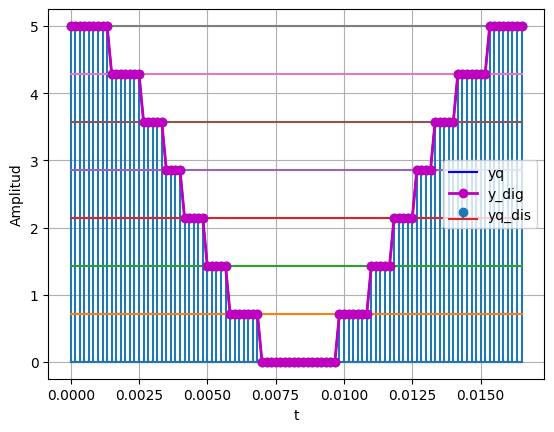

In [19]:
plt.plot(tv,yq,c='b', label='yq')#cs continua

plt.stem(tv,yq, label='yq_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='m',marker='o',label='y_dig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()